# U3 Classification trees

# Index

1. Introduction
2. Learning algorithm
     * Basic algorithm
     * Partition criterion
     * Impurity of a node
     * Maximization of impurity reduction

<p style="page-break-after:always;"></p>

# 1 Introduction

**Classification tree:** $\;$ hierarchical structure for object classification

**Example:** $\;$ tree learnt with the training set $\;\mathcal{D}=\{((1, 1)^t, 1), ((2, 4)^t, 2), ((5, 1)^t, 1), ((5, 4)^t, 1)\}$

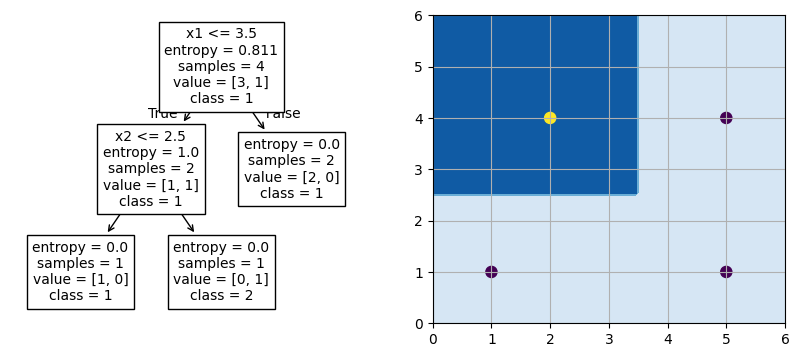

In [1]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[1, 1], [2, 4], [5, 1], [5, 4]]); y =  np.array([1, 2, 1, 1])
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_tree(dt, feature_names=list(('x1', 'x2')), class_names=list(('1', '2')), ax=axes[0], fontsize=10);
xx, yy = np.meshgrid(np.linspace(0, 6, num=100), np.linspace(0, 6, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape); axes[1].grid()
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=64);

<p style="page-break-after:always;"></p>

# 2 Learning algorithm

## Basic algorithm

> `Tree`($\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}$) <br>
>> $(\mathcal{C},L,R,\Delta \mathcal{I})=\,$`Dichotomize`$(\mathcal{D})$ <br>
>> `if` $\;\Delta \mathcal{I}<\epsilon\quad$ `return` $\quad$ `Node`$($`Mode`$(\{c_n\}), -, -, -)$ <br>
>> `if not` $\,\;\quad\quad$ `return` $\quad$ `Node`$(-, \mathcal{C}, $`Tree`$(L),$`Tree`$(R), -)$

* **Partition criterion:** $\;\mathcal{C}$ is the criterion that `Dichotomize` the training set $\mathcal{D}$ into two subsets when it is applied. For example: $x_1 \leq 3.5$
* **Partition (split):** $\;$ subsets $L$ (left) and $R$ (right) is the resulting partition of $\mathcal{D}$ as a result of applying $\mathcal{C}$. For example: $L=\{((1, 1)^t, 1), ((2, 4)^t, 2)\}$ and $R=\{((5, 1)^t, 1), ((5, 4)^t, 1)\}$ 
* **Impurity:** $\;$ we assume the definition of some impurity measure on a dataset
     * **Pure set:** $\;$ a set with all data samples coming from the same class will have zero impurity
     * **Impure set:** $\;$ a set with data samples coming from two or more classes will have positive impurity
* **Impurity reduction:** $\;\Delta \mathcal{I}$ is the quality improvement obtained by dividing $\mathcal{D}$ into $L$ and $R$, measured as a impurity reduction. For example: $\Delta \mathcal{I} = 0.811 - \frac{2}{4} \cdot 1 - \frac{2}{4} \cdot 0 = 0.311$ 
* **Impurity threshold:** $\;\epsilon$ is the minimum impurity reduction that must be achieved for the quality improvement to be considered significant. For example: $\epsilon = 0.0$

<p style="page-break-after:always;"></p>

## Partition criterion

**Usual criterion:** $\;$ variable-threshold pair $(d, r)$ that defines the split of $\mathcal{D}=\{(\boldsymbol{x}_n,y_n )\}$ into 
$$L=\{(\boldsymbol{x}_n,c_n): x_{nd}\leq r\}%
\quad\text{and}\quad%
R=\{(\boldsymbol{x}_n,c_n): x_{nd}> r\}$$

**Example (cont.):** $\;$ partition of $\mathcal{D}=\{((1, 1)^t, 1), ((2, 4)^t, 2), ( (5, 1)^t, 1), ((5, 4)^t, 1)\}\;$ with $\;(d,r)=(1, 3.5)$
$$L=\{((1, 1)^t, 1), ((2, 4)^t, 2)\}%
\quad\text{and}\quad%
R=\{((5, 1)^t, 1), ((5, 4)^t, 1)\}$$

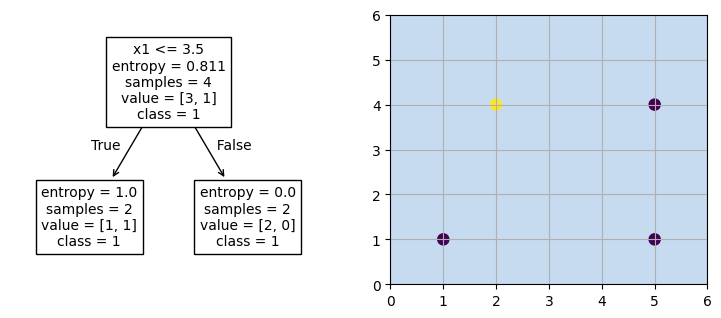

In [4]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[1, 1], [2, 4], [5, 1], [5, 4]]); y =  np.array([1, 2, 1, 1])
dt_depth1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
plot_tree(dt_depth1, feature_names=list(('x1', 'x2')), class_names=list(('1', '2')), ax=axes[0], fontsize=10);
xx, yy = np.meshgrid(np.linspace(0, 6, num=100), np.linspace(0, 6, num=100))
Z = dt_depth1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape); axes[1].grid()
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=64);

## Impurity of a node

**Impurity of a node $t$:** $\;$ measure of the uncertainty about the class of the objects in $t$

**Usual measure of impurity:** $\;$ **entropy** of the class posterior probability given by the empirical distribution in $t$
$$\mathcal{I}(t) = - \sum_{c=1}^C \hat{P}(c\mid t)\,\log_2 \hat{P}(c\mid t)
\quad\text{where}\quad%
\hat{P}(c\mid t)=\frac{N_c(t)}{N(t)}$$

**Example (cont.):** $\;$ assume $\;0\log_2 0=0$
$$\begin{align*}
\mathcal{I}(\mathcal{D})&=-\frac{3}{4}\,\log_2\frac{3}{4}-\frac{1}{4}\,\log_2\frac {1}{4}=0.8113\\
\mathcal{I}(\{((1, 1)^t, 1), ((2, 4)^t, 2)\})&=-\frac{1}{2}\,\log_2\frac{1}{2}-\frac{1}{2}\,\log_2\frac{1}{2}=1\\
\mathcal{I}(\{((5, 1)^t, 1), ((5, 4)^t, 1)\})&=-\frac{2}{2}\,\log_2\frac{2}{2}-\frac{0}{2}\,\log_2\frac{0}{2}=0\\
\mathcal{I}(\{((1, 1)^t, 1)\})&=-\frac{1}{1}\,\log_2\frac{1}{1}-\frac{0 }{1}\,\log_2\frac{0}{1}=0\\
\mathcal{I}(\{((2, 4)^t, 2)\})&=-\frac{0}{1}\,\log_2\frac{0}{1}-\frac{1 }{1}\,\log_2\frac{1}{1}=0
\end{align*}$$

In [3]:
import numpy as np
entropy = lambda x: np.sum(-x * np.log2(x, out=np.zeros_like(x), where=(x!=0)))
I_root = entropy(np.array([3/4, 1/4]));     print(round(I_root, 4))
I_root_L = entropy(np.array([1/2, 1/2]));   print(round(I_root_L, 4))
I_root_R = entropy(np.array([2/2, 0/2]));   print(round(I_root_R, 4))
I_root_L_L = entropy(np.array([1/1, 0/1])); print(round(I_root_L_L, 4))
I_root_L_R = entropy(np.array([0/1, 1/1])); print(round(I_root_L_R, 4))

0.8113
1.0
0.0
0.0
0.0


## Maximization of impurity reduction

**Maximizing the impurity reduction:** $\;$ we assume that the partition of a node $t$ is performed by searching for a pair
variable-threshold with which we achieve a maximum impurity reduction
$$(d^*,r^*) = \operatorname*{argmax}_{d, r} \; \Delta\mathcal{I}(d,r)%
\qquad\text{with}\qquad%
\Delta\mathcal{I}(d,r)=\mathcal{I}(t)-\frac{N(L(t))}{N(t)}\mathcal{I}(L(t)) -\frac{N(R(t))}{N(t)}\mathcal{I}(R(t))$$

**Example (cont.):** $\;$ root node impurity reduction with $(d,r)=(1,3.5)$
$$\Delta\mathcal{I}(1,3.5)=0.8113-\frac{2}{4}\cdot 1-\frac{2}{4}\cdot 0 = 0.8113 - 0.50= 0.3113$$

<p style="page-break-after:always;"></p>